# Візуалізація даних.

In [2]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. 
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  


In [3]:
df_taxi = sns.load_dataset('taxis')

1.Виведено
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [6]:
display(df_taxi.head(3))
display(df_taxi.dtypes)
display(df_taxi.shape)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup              object
dropoff             object
passengers           int64
distance           float64
fare               float64
tip                float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
dtype: object

(6433, 14)

2.Перевіримо, чи є в цьому наборі даних пропущені значення. 

In [7]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [8]:
df_nan = df_taxi[df_taxi.dropoff_borough.isnull()]
df_nan = df_nan.astype({'pickup': 'datetime64[ns]','dropoff': 'datetime64[ns]'})
df_nan.insert(loc=3, column="duration", value=df_nan.dropoff - df_nan.pickup)
df_nan

,pickup,dropoff,passengers,duration,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0 days 00:00:03,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0 days 00:00:19,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,0 days 00:33:04,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0 days 00:00:04,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0 days 00:00:05,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,0 days 00:18:51,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0 days 00:11:23,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0 days 00:09:54,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0 days 00:00:00,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,0 days 00:19:13,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


>ВИСНОВКИ:Вибірку інформації виведено на основі пустих значень у стопчику з даними району, де закінчилась поїздка. 
Припущення (гіпотези) щодо незаповненності даних у вибірці:

>1) у даному випадку всі значення зони, де закінчилась поїздка також пусті, як і району. Це може свідчити про нездійснення поїздки, її передчасне завершення (наприклад, у разі затора на дорозі) або незаповнення даних клієнтом/водієм.

>2) поїздки, в яких відстань рівна 0 можуть бути відхиленими самим клієнтом з різних причин, це можна також відслідкувати за тривалістю поїздки(додана колонка "duration"), котра рівна 0 або менше 2 хвилин. В такому випадку, можливо плата за хибний виклик не повертається клієнту;

>3) значення кінцевої (початкової) локації поїздки можуть бути пустими через використання певної категорії таксі поза зоною їх дії (як вказано на сайті жовті таксі їздять по Нью-Йорку, зелені - пн.Манхеттен та віддалені райони). Можливо через категорію таксі водії не можуть вказати точки відправлення та прибуття поза зоною їх дії.

>4) незаповненність даних також може бути через збій системи.

>На мою думку, рядки даної вибірки слід видалити для потреб аналізу.

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створено набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

In [9]:
df_taxi_clean = df_taxi.fillna('NA')

In [10]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

4.Щоб подивитись на дані у динаміці , перетворено колонку `pickup` набору даних `df_taxi_clean`у формат `datetime64[ns]`. Результат перетворення збережено в тій самій колонці `pickup`.

In [11]:
df_taxi_clean = df_taxi.astype({'pickup': 'datetime64[ns]'})

In [12]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

5.Аналітика по дням.

In [13]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

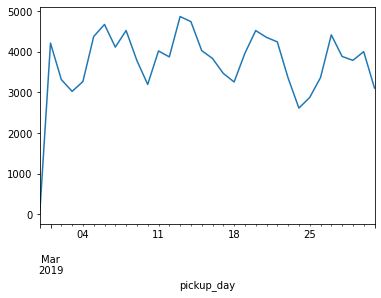

In [14]:
df_taxi_clean.groupby('pickup_day').total.sum().plot();


> КОМЕНТАР: Дивним здається різкий початок графіку близький до 0.

6.Кількість рядків для кожного pickup_day.

In [15]:
df_taxi_clean.pickup_day.value_counts()

2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: pickup_day, dtype: int64

Для дати 2019-02-28 є тільки один рядок. Це запис, який схоже, потрапив сюди випадково, тому видаляємо з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. 

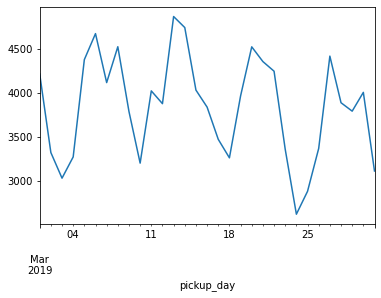

In [16]:
df_taxi_clean = df_taxi_clean[df_taxi_clean.pickup_day !='2019-02-28']
df_taxi_clean.groupby('pickup_day').total.sum().plot();


7.Динаміка сумарних платежів по районам. 

In [17]:
borough_pivot = df_taxi_clean.pivot_table(index='pickup_day', columns = 'pickup_borough', values = 'total')
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,17.631429,20.767647,16.422124,25.149545
2019-03-02,NaN,14.656000,15.884971,26.831176
2019-03-03,26.916667,18.502727,16.280853,30.623571
2019-03-04,18.400000,18.873000,15.466947,38.487200
2019-03-05,49.080000,29.389474,16.655084,26.412857
2019-03-06,32.662500,13.235333,16.592749,32.052308
2019-03-07,NaN,27.546875,16.512406,39.142000
2019-03-08,19.800000,21.588182,17.303807,35.470000
2019-03-09,20.055000,20.875556,17.355029,28.429444


В якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   

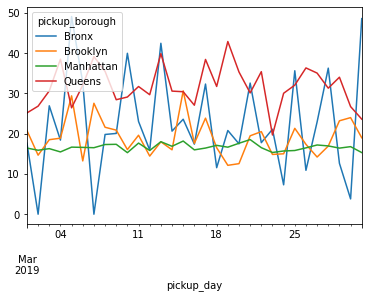

In [18]:
borough_pivot.fillna(0).plot();


>КОМЕНТАР: Найчастіше найбільша сума денних платежів у районі Queens.
Застосуванням fillna(0) замінили значення пустих клітинок на 0, тому на графіку лінія Bronx не переривається, а спадає до нуля.

8.Виведено гістограми суми денних платежів за поїздки по кожному з районів. 

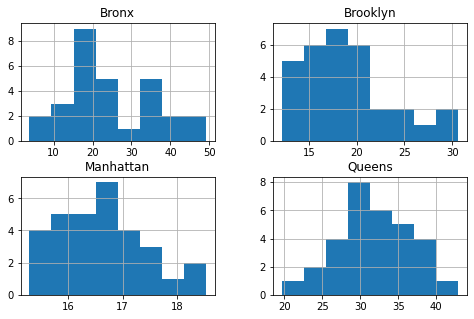

In [19]:
df_bp = pd.DataFrame(borough_pivot)
df_bp.hist(figsize = (8, 5), bins=8);

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по районам. 

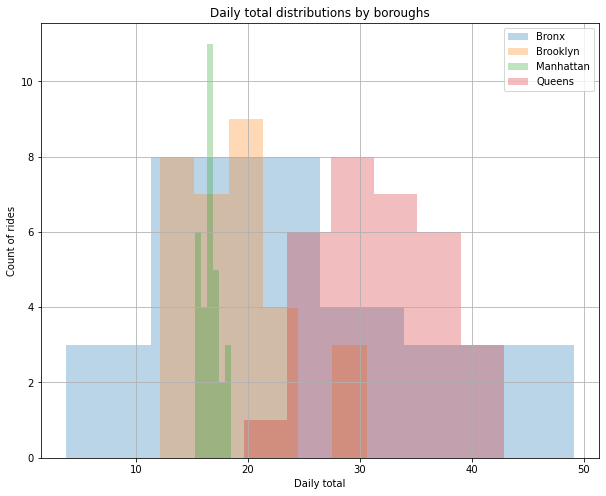

In [20]:
plt.figure(figsize = (10,8))
for col in df_bp.columns:
    plt.hist(df_bp[col], bins = 6, alpha = 0.3, label = col)
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.title('Daily total distributions by boroughs')
plt.legend()
plt.grid()
plt.show();

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. 

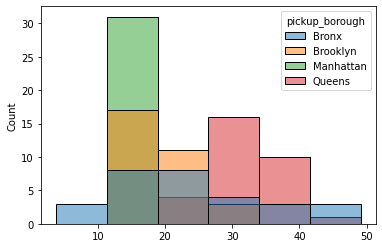

In [21]:
sns.histplot(data=borough_pivot, bins=6);

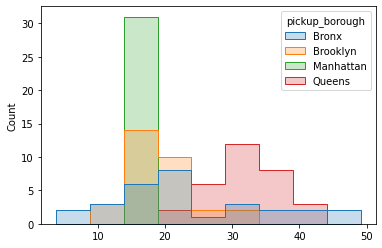

In [22]:
sns.histplot(data=borough_pivot, element="step");

10.З допомогою seaborn виведено гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). 

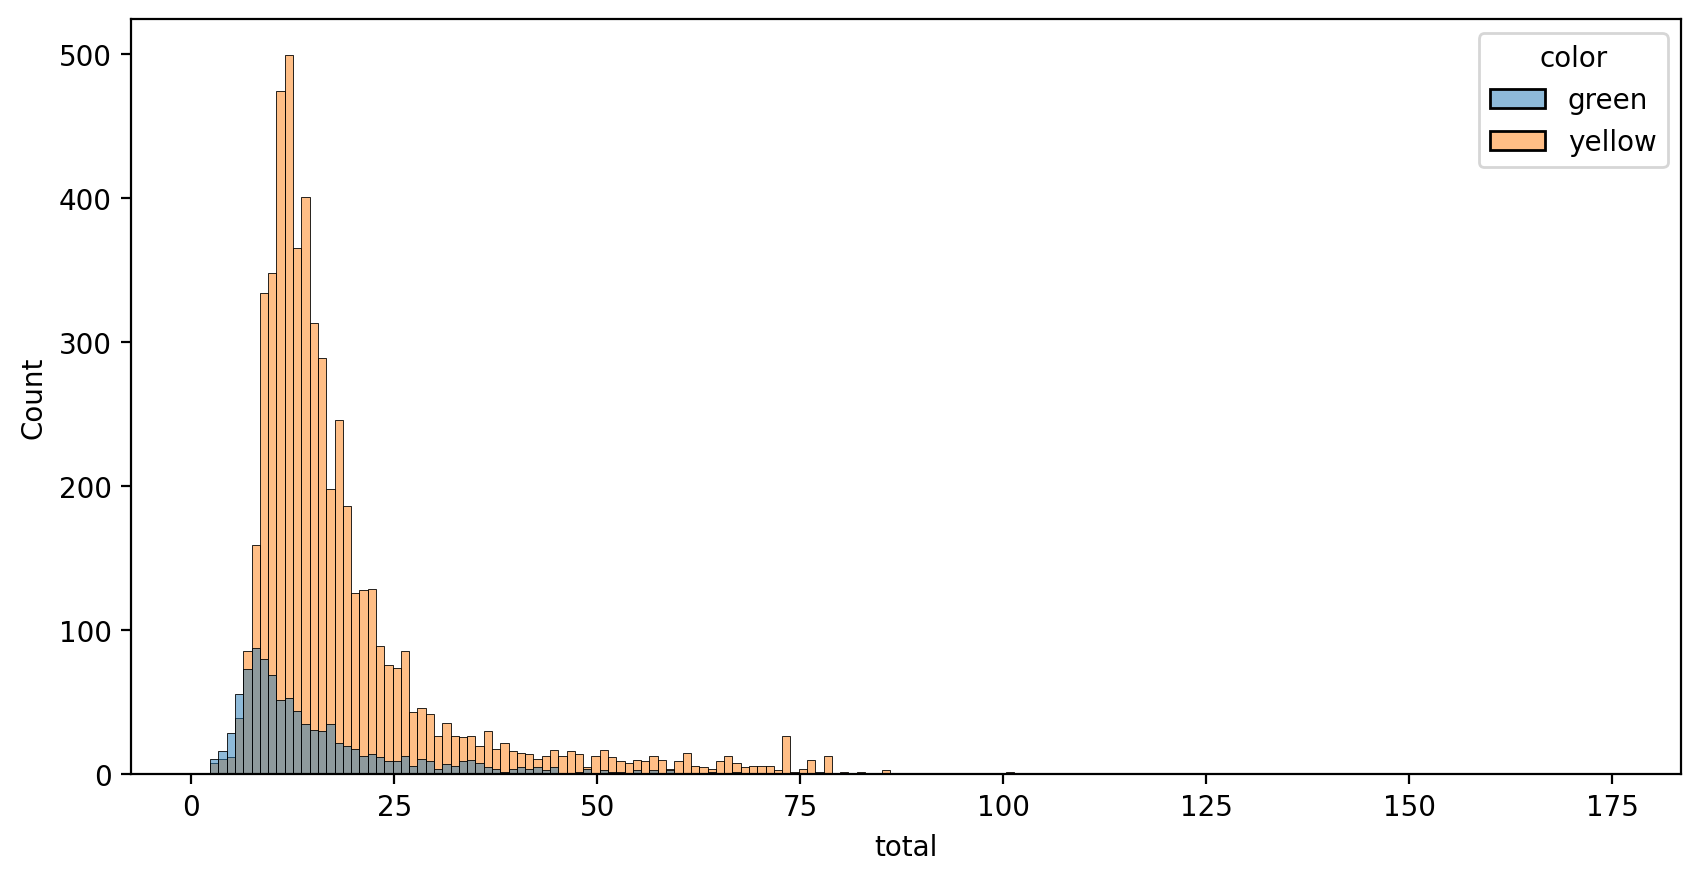

In [23]:
plt.figure(figsize = (10,5), dpi = 200)
sns.histplot(data=df_taxi_clean.sort_values(by ='color'), x = 'total', hue = 'color', edgecolor = 'black');


11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудовано діаграму розсіювання між дальністю поїздки і розміром чайових. 

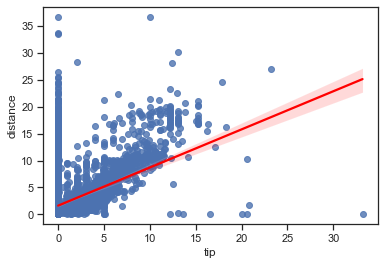

In [22]:
sns.set_theme(style='ticks')
sns.regplot(data = df_taxi_clean, x='tip', y='distance', line_kws = {'color':'red'});

12.Побудовано поденну динаміку чайових по районам, в яких забрали пасажира:
- при початку поїздки в якому районі **найрідше** дають чайові?
- а в поїздках з якого району **найчастіше** дають чайові? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

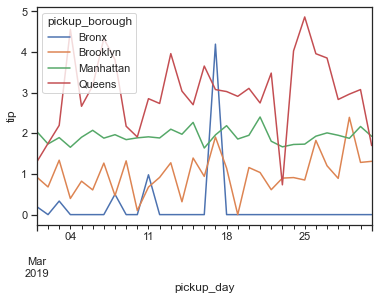

In [25]:
borough_pivot2 = df_taxi_clean.pivot_table(index='pickup_day', columns = 'pickup_borough', values = 'tip')
borough_pivot2.fillna(0).plot()
plt.ylabel('tip');

>ВІДПОВІДІ:
    - найрідше дають чайові в районі Bronx;
    - найчастіше дають чайові в поїздках з району Queens;
    - найстабільніший розмір чайових в районі Manhattan.


13.Побудуйте box-plot розміру чайових по району старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

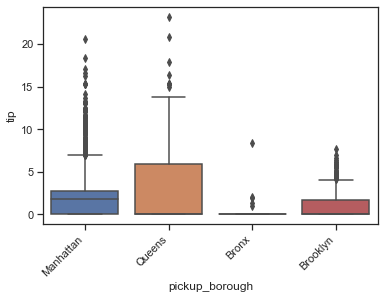

In [23]:
sns.set_theme(style ='ticks')
sns.boxplot(y='tip', x='pickup_borough', data= df_taxi_clean)
plt.xticks(rotation=45, ha='right');

14. Первіримо можливі гіпотези напявності чайових: 1.у разі оплати клієнтом платних доріг, то задля економії чайові водію не залишають; 2.при більшій дистанції чайові зростають; 3.чим більша плата за поїдку, тим більші чайові. 

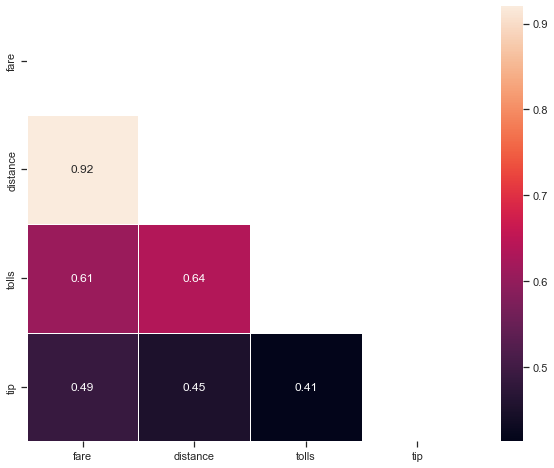

In [27]:
import numpy as np

corr_data = df_taxi_clean[['fare', 'distance', 'tolls', 'tip']]
plt.figure(figsize=(10,8))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot = True, linewidth = .8, mask = matrix, cmap = 'rocket');

З огляду на створену теплову мапу можна зробити висновки, що розмір чайових має слабку залежність від відстані, плати по тарифу чи проїзду по платним дорогам.
Високий показник кореляції між відстанню та платою, що цілком зрозуміло, адже вартість поїздки напряму залежить від довжини маршруту.

15. Які найбільш популярні маршрути таксі?

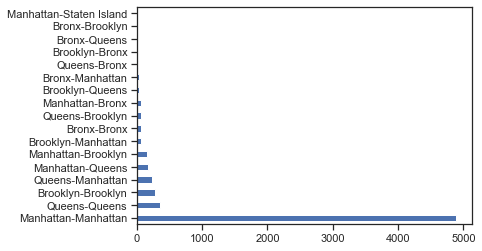

In [28]:
#додала колонку з можливими маршрутами таксі
df_taxi_clean.insert(loc=12, column="route", value=df_taxi_clean.pickup_borough + '-' + df_taxi_clean.dropoff_borough)
df_taxi_clean.route.value_counts().plot.barh();



>ВИСНОВКИ: Найбільш популярними в даній компанії таксі являються поїздки в межах міського округу Манхеттен за маршрутом Manhattan-Manhattan - близько 5 тисяч поїздок за місяць. Також на візуалізації можна відмітити поодинокі випадки поїздок по маршрутах:Queens-Bronx, Brooklyn-Bronx, Bronx-Queens, Bronx-Brooklyn, Manhattan-Staten Island. Наведені статистичні дані допоможуть для прийняття управлінського рішення щодо раціонального розміщення транспорту - найбільше машин розмістити в районі, де найбільший попит та перевірити чи не пов'язаний низький попит з нестачею авто в певному районі.

16. Які маршртути мають найбільшу середню вартість поїздки?

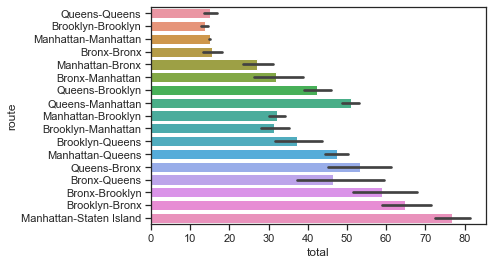

In [33]:
sns.barplot(x='total', y='route', data = df_taxi_clean.sort_values(by='total'));

>ВИСНОВКИ: Найбільша середня вартість поїздки припадає на маршрути Manhattan-Staten Island, Bronx-Brooklyn, Brooklyn-Bronx, Queens-Bronx, Bronx-Queens.Якщо повернутись до візуалізації 2, то перелічені маршрути найменш популярні, отже одним із факторів низького попиту може бути висока вартість поїдки. А, наприклад, маршрут Manhattan-Manhattan є одним із найдешевших та найбільш популярних не лише через локацію, а і приємну вартість.
